In [1]:
import pandas as pd
import os
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
files = os.listdir('.')
print(files)

['with_readability.csv', 'data_with_sentiment.csv', 'reference_df.csv', 'data_with_sentiment_nums.csv', 'feature_set.csv', 'topics_df.csv', 'master_sheet', '2018_2019_raw_data.csv', 'master_sheet.csv', 'full_price_data.csv', 'Automated CTO Scoring Database.ipynb', '.ipynb_checkpoints', 'mdas_complete.csv', 'questions_data.csv', 'MD&A Length Analysis NLP.ipynb', 'test_data.csv']


In [5]:
price_df = pd.read_csv('full_price_data.csv', index_col = 'Date')
##mda_df = pd.read_csv('mdas_complete.csv', index_col = 'Unnamed: 0')
topics_df = pd.read_csv('topics_df.csv', index_col = 'Unnamed: 0')


In [38]:
price_df.head()

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
1999-11-18,32.546494,35.765381,28.612303,31.473534,27.066582,62546380.0,A
1999-11-19,30.713518,30.758226,28.478184,28.880545,24.836662,15234146.0,A
1999-11-22,29.551144,31.473534,28.657009,31.473534,27.066582,6577870.0,A
1999-11-23,30.400572,31.205294,28.612303,28.612303,24.605980,5975611.0,A
1999-11-24,28.701717,29.998213,28.612303,29.372318,25.259573,4843231.0,A


In [ ]:
mda_df.head()

In [39]:
topics_df.head()

,Unnamed: 0.1,ticker,date,endpoint,mda,tokens,flags,num_words,topic
Unnamed: 0,,,,,,,,,
0,0,A,2023-12-20,https://www.sec.gov/Archives/edgar/data/000109...,item managements discussion and analysis of fi...,"['item', 'management', 'discussion', 'analysis...",0,14080,3
1,1,A,2022-12-21,https://www.sec.gov/Archives/edgar/data/000109...,item managements discussion and analysis of fi...,"['item', 'management', 'discussion', 'analysis...",0,13854,3
2,2,A,2021-12-17,https://www.sec.gov/Archives/edgar/data/000109...,item managements discussion and analysis of fi...,"['item', 'management', 'discussion', 'analysis...",0,14657,3
3,3,A,2020-12-18,https://www.sec.gov/Archives/edgar/data/000109...,item managements discussion and analysis of fi...,"['item', 'management', 'discussion', 'analysis...",0,14405,3
4,4,A,2019-12-19,https://www.sec.gov/Archives/edgar/data/000109...,item managements discussion and analysis of fi...,"['item', 'management', 'discussion', 'analysis...",0,13366,3


In [ ]:
pip install nltk

In [ ]:
nltk.download('all')

In [9]:
read_df = pd.read_csv('with_readability.csv')

In [33]:
read_df.head()

,Unnamed: 0,ticker,date,endpoint,mda,mda_cleaned_nums,flesch_ease,flesch_grade,fog,dale_chall,processed_text,sentiment
0,0,A,2023-12-20,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents ISSUER PURCHASES OF EQUITY S...,Item 7. Management's Discussion and Analysis o...,31.51,14.5,10.67,6.16,item 7. management 's discussion analysis fina...,1
1,1,A,2022-12-21,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents ISSUER PURCHASES OF EQUITY S...,Item 7. Management's Discussion and Analysis o...,39.87,13.4,10.76,6.22,item 7. management 's discussion analysis fina...,1
2,2,A,2021-12-17,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 6.[Reserved]Item 7. Man...,Item 7. Management's Discussion and Analysis o...,39.97,13.3,10.68,6.18,item 7. management 's discussion analysis fina...,1
3,3,A,2020-12-18,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 7. Management's Discuss...,Item 7. Management's Discussion and Analysis o...,39.77,13.4,10.81,6.23,item 7. management 's discussion analysis fina...,1
4,4,A,2019-12-19,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 7. Management's Discuss...,Item 7. Management's Discussion and Analysis o...,33.65,13.7,10.31,6.44,item 7. management 's discussion analysis fina...,1


In [24]:
pd.set_option('display.max_colwidth', None)

# Print the first item in the specific column
print(read_df['mda_cleaned_nums'].iloc[0])

Item 7. Management's Discussion and Analysis of Financial Condition and Results of Operations The following discussion should be read in conjunction with the consolidated financial statements and notes thereto included elsewhere in this Annual Report on Form 10-K. This report contains forward-looking statements including, without limitation, statements regarding growth opportunities, including for revenue and our end markets, strength and drivers of the markets into which we sell, sales funnels, our strategic direction, new product and service introductions and the position of our current products and services, market demand for and adoption of our products, the ability of our products and solutions to address customer needs and meet industry requirements, our focus on differentiating our product solutions, improving our customers’ experience and growing our earnings, future financial results, our operating margin, mix, our investments, including in manufacturing infrastructure, resear

In [22]:
def preprocess_text(txt):
    tokens = word_tokenize(txt.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

In [25]:
read_df['processed_text'] = read_df['mda_cleaned_nums'].apply(preprocess_text)

In [27]:
pd.reset_option('display.max_colwidth')
read_df.head()

,Unnamed: 0,ticker,date,endpoint,mda,mda_cleaned_nums,flesch_ease,flesch_grade,fog,dale_chall,processed_text
0,0,A,2023-12-20,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents ISSUER PURCHASES OF EQUITY S...,Item 7. Management's Discussion and Analysis o...,31.51,14.5,10.67,6.16,item 7. management 's discussion analysis fina...
1,1,A,2022-12-21,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents ISSUER PURCHASES OF EQUITY S...,Item 7. Management's Discussion and Analysis o...,39.87,13.4,10.76,6.22,item 7. management 's discussion analysis fina...
2,2,A,2021-12-17,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 6.[Reserved]Item 7. Man...,Item 7. Management's Discussion and Analysis o...,39.97,13.3,10.68,6.18,item 7. management 's discussion analysis fina...
3,3,A,2020-12-18,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 7. Management's Discuss...,Item 7. Management's Discussion and Analysis o...,39.77,13.4,10.81,6.23,item 7. management 's discussion analysis fina...
4,4,A,2019-12-19,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 7. Management's Discuss...,Item 7. Management's Discussion and Analysis o...,33.65,13.7,10.31,6.44,item 7. management 's discussion analysis fina...


In [47]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_analysis(txt):
    analyzer_scores = analyzer.polarity_scores(txt)
    sentiment = 1 if analyzer_scores['pos'] > 0 else 0
    return sentiment


def segmented_sent_analysis(txt): 
    return analyzer.polarity_scores(txt)
    


In [ ]:
read_df['sentiment'] = read_df['processed_text'].apply(sentiment_analysis)

In [49]:
read_df['segmented_sentiment'] = read_df['processed_text'].apply(segmented_sent_analysis)


TypeError: 'int' object is not subscriptable

In [54]:
read_df['neg'] = read_df['segmented_sentiment'].apply(lambda x: x['neg'])
read_df['neu'] = read_df['segmented_sentiment'].apply(lambda x: x['neu'])
read_df['pos'] = read_df['segmented_sentiment'].apply(lambda x: x['pos'])
##read_df['compound'] = read_df['segmented_sentiment'].apply(lambda x: x['com'])

In [9]:
read_df.head()

NameError: name 'read_df' is not defined

,Unnamed: 0,ticker,date,endpoint,mda,mda_cleaned_nums,flesch_ease,flesch_grade,fog,dale_chall,processed_text,sentiment,segmented_sentiment,neg,neu,pos
3191,3191,BCRH,2016-03-09,https://www.sec.gov/Archives/edgar/data/000158...,Table of Contents Executive Overview We are a ...,Item 7 A. Quantitative and Qualitative Disclos...,30.16,13.0,15.64,11.47,item 7 a. quantitative qualitative disclosure ...,1,"{'neg': 0.346, 'neu': 0.472, 'pos': 0.182, 'co...",0.346,0.472,0.182
3192,3192,BCRH,2015-03-11,https://www.sec.gov/Archives/edgar/data/000158...,"Table of Contents During 2014, our first full ...",Item 7 A. Quantitative and Qualitative Disclos...,19.47,15.0,15.80,11.98,item 7 a. quantitative qualitative disclosure ...,1,"{'neg': 0.357, 'neu': 0.518, 'pos': 0.124, 'co...",0.357,0.518,0.124
18669,18669,EVR,2021-02-25,https://www.sec.gov/Archives/edgar/data/000136...,Table of Contents The following discussion sho...,"Item 7 "" – Market Risk and Credit Risk"" above.54",88.74,2.9,3.20,13.90,item 7 `` – market risk credit risk '' above.54,1,"{'neg': 0.356, 'neu': 0.424, 'pos': 0.22, 'com...",0.356,0.424,0.220
18670,18670,EVR,2020-02-25,https://www.sec.gov/Archives/edgar/data/000136...,Table of Contents The following discussion sho...,"Item 7 "" – Market Risk and Credit Risk"" above.56",88.74,2.9,3.20,13.90,item 7 `` – market risk credit risk '' above.56,1,"{'neg': 0.356, 'neu': 0.424, 'pos': 0.22, 'com...",0.356,0.424,0.220
18671,18671,EVR,2019-02-22,https://www.sec.gov/Archives/edgar/data/000136...,Table of Contents The following discussion sho...,"Item 7 "" – Market Risk and Credit Risk"" above.57",88.74,2.9,3.20,13.90,item 7 `` – market risk credit risk '' above.57,1,"{'neg': 0.356, 'neu': 0.424, 'pos': 0.22, 'com...",0.356,0.424,0.220
18672,18672,EVR,2018-02-23,https://www.sec.gov/Archives/edgar/data/000136...,Table of Contents The following discussion sho...,"Item 7 "" – Market Risk and Credit Risk"" above.55",88.74,2.9,3.20,13.90,item 7 `` – market risk credit risk '' above.55,1,"{'neg': 0.356, 'neu': 0.424, 'pos': 0.22, 'com...",0.356,0.424,0.220
18673,18673,EVR,2017-02-24,https://www.sec.gov/Archives/edgar/data/000136...,Table of Contents The following discussion sho...,"Item 7"" – Market Risk and Credit Risk"" above.55",88.74,2.9,3.20,13.90,item 7 '' – market risk credit risk '' above.55,1,"{'neg': 0.356, 'neu': 0.424, 'pos': 0.22, 'com...",0.356,0.424,0.220
18674,18674,EVR,2016-02-24,https://www.sec.gov/Archives/edgar/data/000136...,Table of Contents The following discussion sho...,"Item 7 "" – Market Risk and Credit Risk"" above.51",88.74,2.9,3.20,13.90,item 7 `` – market risk credit risk '' above.51,1,"{'neg': 0.356, 'neu': 0.424, 'pos': 0.22, 'com...",0.356,0.424,0.220
18675,18675,EVR,2015-02-27,https://www.sec.gov/Archives/edgar/data/000136...,Table of Contents The following discussion sho...,Item 7 “ – Market Risk and Credit Risk” above.50,88.74,2.9,3.20,13.90,item 7 “ – market risk credit risk ” above.50,1,"{'neg': 0.429, 'neu': 0.306, 'pos': 0.265, 'co...",0.429,0.306,0.265
18676,18676,EVR,2014-02-28,https://www.sec.gov/Archives/edgar/data/000136...,Table of Contents The following discussion sho...,Item 7 “ – Market Risk and Credit Risk” above.50,88.74,2.9,3.20,13.90,item 7 “ – market risk credit risk ” above.50,1,"{'neg': 0.429, 'neu': 0.306, 'pos': 0.265, 'co...",0.429,0.306,0.265


In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
data_with_sentiment = pd.DataFrame(read_df)

NameError: name 'read_df' is not defined

In [5]:
data_with_sentiment.to_csv('data_with_sentiment.csv', index=False)

NameError: name 'data_with_sentiment' is not defined

In [8]:
price_df[price_df["Close"] < price_df['Open']]

NameError: name 'price_df' is not defined

In [17]:
df = pd.read_csv('data_with_sentiment.csv')

In [18]:
df

,Unnamed: 0,ticker,date,endpoint,mda,mda_cleaned_nums,flesch_ease,flesch_grade,fog,dale_chall,processed_text,sentiment,segmented_sentiment,neg,neu,pos
0,0,A,2023-12-20,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents ISSUER PURCHASES OF EQUITY S...,Item 7. Management's Discussion and Analysis o...,31.51,14.5,10.67,6.16,item 7. management 's discussion analysis fina...,1,"{'neg': 0.051, 'neu': 0.764, 'pos': 0.185, 'co...",0.051,0.764,0.185
1,1,A,2022-12-21,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents ISSUER PURCHASES OF EQUITY S...,Item 7. Management's Discussion and Analysis o...,39.87,13.4,10.76,6.22,item 7. management 's discussion analysis fina...,1,"{'neg': 0.047, 'neu': 0.752, 'pos': 0.2, 'comp...",0.047,0.752,0.200
2,2,A,2021-12-17,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 6.[Reserved]Item 7. Man...,Item 7. Management's Discussion and Analysis o...,39.97,13.3,10.68,6.18,item 7. management 's discussion analysis fina...,1,"{'neg': 0.046, 'neu': 0.752, 'pos': 0.202, 'co...",0.046,0.752,0.202
3,3,A,2020-12-18,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 7. Management's Discuss...,Item 7. Management's Discussion and Analysis o...,39.77,13.4,10.81,6.23,item 7. management 's discussion analysis fina...,1,"{'neg': 0.046, 'neu': 0.767, 'pos': 0.187, 'co...",0.046,0.767,0.187
4,4,A,2019-12-19,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 7. Management's Discuss...,Item 7. Management's Discussion and Analysis o...,33.65,13.7,10.31,6.44,item 7. management 's discussion analysis fina...,1,"{'neg': 0.044, 'neu': 0.77, 'pos': 0.187, 'com...",0.044,0.770,0.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37727,37727,ZYME,2018-03-14,https://www.sec.gov/Archives/edgar/data/000140...,Table of Contents The following discussion sho...,Table of Contents The following discussion sho...,32.53,14.1,10.90,6.53,table content following discussion read conjun...,1,"{'neg': 0.04, 'neu': 0.773, 'pos': 0.187, 'com...",0.040,0.773,0.187
37728,37728,ZYNE,2019-03-11,https://www.sec.gov/Archives/edgar/data/000162...,Table of Contents Item 7. Management’s Discuss...,Item 7. Management’s Discussion and Analysis o...,33.24,13.8,11.20,7.18,item 7. management ’ discussion analysis finan...,1,"{'neg': 0.053, 'neu': 0.807, 'pos': 0.139, 'co...",0.053,0.807,0.139
37729,37729,ZYNE,2018-03-12,https://www.sec.gov/Archives/edgar/data/000162...,Table of Contents Item 7. Management’s Discuss...,Item 7. Management’s Discussion and Analysis o...,32.43,14.2,11.50,7.15,item 7. management ’ discussion analysis finan...,1,"{'neg': 0.054, 'neu': 0.799, 'pos': 0.148, 'co...",0.054,0.799,0.148
37730,37730,ZYNE,2017-03-27,https://www.sec.gov/Archives/edgar/data/000162...,Table of Contents Item 7. Management’s Discuss...,Item 7. Management’s Discussion and Analysis o...,32.22,14.2,11.50,7.06,item 7. management ’ discussion analysis finan...,1,"{'neg': 0.054, 'neu': 0.789, 'pos': 0.157, 'co...",0.054,0.789,0.157


In [23]:
df.rename(columns = {"neg":"Negative", "neu":"Neutral", "pos":"Positive"})


,Unnamed: 0,ticker,date,endpoint,mda,mda_cleaned_nums,flesch_ease,flesch_grade,fog,dale_chall,processed_text,sentiment,segmented_sentiment,Negative,Neutral,Positive
0,0,A,2023-12-20,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents ISSUER PURCHASES OF EQUITY S...,Item 7. Management's Discussion and Analysis o...,31.51,14.5,10.67,6.16,item 7. management 's discussion analysis fina...,1,"{'neg': 0.051, 'neu': 0.764, 'pos': 0.185, 'co...",0.051,0.764,0.185
1,1,A,2022-12-21,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents ISSUER PURCHASES OF EQUITY S...,Item 7. Management's Discussion and Analysis o...,39.87,13.4,10.76,6.22,item 7. management 's discussion analysis fina...,1,"{'neg': 0.047, 'neu': 0.752, 'pos': 0.2, 'comp...",0.047,0.752,0.200
2,2,A,2021-12-17,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 6.[Reserved]Item 7. Man...,Item 7. Management's Discussion and Analysis o...,39.97,13.3,10.68,6.18,item 7. management 's discussion analysis fina...,1,"{'neg': 0.046, 'neu': 0.752, 'pos': 0.202, 'co...",0.046,0.752,0.202
3,3,A,2020-12-18,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 7. Management's Discuss...,Item 7. Management's Discussion and Analysis o...,39.77,13.4,10.81,6.23,item 7. management 's discussion analysis fina...,1,"{'neg': 0.046, 'neu': 0.767, 'pos': 0.187, 'co...",0.046,0.767,0.187
4,4,A,2019-12-19,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 7. Management's Discuss...,Item 7. Management's Discussion and Analysis o...,33.65,13.7,10.31,6.44,item 7. management 's discussion analysis fina...,1,"{'neg': 0.044, 'neu': 0.77, 'pos': 0.187, 'com...",0.044,0.770,0.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37727,37727,ZYME,2018-03-14,https://www.sec.gov/Archives/edgar/data/000140...,Table of Contents The following discussion sho...,Table of Contents The following discussion sho...,32.53,14.1,10.90,6.53,table content following discussion read conjun...,1,"{'neg': 0.04, 'neu': 0.773, 'pos': 0.187, 'com...",0.040,0.773,0.187
37728,37728,ZYNE,2019-03-11,https://www.sec.gov/Archives/edgar/data/000162...,Table of Contents Item 7. Management’s Discuss...,Item 7. Management’s Discussion and Analysis o...,33.24,13.8,11.20,7.18,item 7. management ’ discussion analysis finan...,1,"{'neg': 0.053, 'neu': 0.807, 'pos': 0.139, 'co...",0.053,0.807,0.139
37729,37729,ZYNE,2018-03-12,https://www.sec.gov/Archives/edgar/data/000162...,Table of Contents Item 7. Management’s Discuss...,Item 7. Management’s Discussion and Analysis o...,32.43,14.2,11.50,7.15,item 7. management ’ discussion analysis finan...,1,"{'neg': 0.054, 'neu': 0.799, 'pos': 0.148, 'co...",0.054,0.799,0.148
37730,37730,ZYNE,2017-03-27,https://www.sec.gov/Archives/edgar/data/000162...,Table of Contents Item 7. Management’s Discuss...,Item 7. Management’s Discussion and Analysis o...,32.22,14.2,11.50,7.06,item 7. management ’ discussion analysis finan...,1,"{'neg': 0.054, 'neu': 0.789, 'pos': 0.157, 'co...",0.054,0.789,0.157


In [22]:
df.to_csv('data_with_sentiment_nums.csv', index=False)

In [25]:
df.head()

,Unnamed: 0,ticker,date,endpoint,mda,mda_cleaned_nums,flesch_ease,flesch_grade,fog,dale_chall,processed_text,sentiment,segmented_sentiment,neg,neu,pos
0,0,A,2023-12-20,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents ISSUER PURCHASES OF EQUITY S...,Item 7. Management's Discussion and Analysis o...,31.51,14.5,10.67,6.16,item 7. management 's discussion analysis fina...,1,"{'neg': 0.051, 'neu': 0.764, 'pos': 0.185, 'co...",0.051,0.764,0.185
1,1,A,2022-12-21,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents ISSUER PURCHASES OF EQUITY S...,Item 7. Management's Discussion and Analysis o...,39.87,13.4,10.76,6.22,item 7. management 's discussion analysis fina...,1,"{'neg': 0.047, 'neu': 0.752, 'pos': 0.2, 'comp...",0.047,0.752,0.200
2,2,A,2021-12-17,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 6.[Reserved]Item 7. Man...,Item 7. Management's Discussion and Analysis o...,39.97,13.3,10.68,6.18,item 7. management 's discussion analysis fina...,1,"{'neg': 0.046, 'neu': 0.752, 'pos': 0.202, 'co...",0.046,0.752,0.202
3,3,A,2020-12-18,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 7. Management's Discuss...,Item 7. Management's Discussion and Analysis o...,39.77,13.4,10.81,6.23,item 7. management 's discussion analysis fina...,1,"{'neg': 0.046, 'neu': 0.767, 'pos': 0.187, 'co...",0.046,0.767,0.187
4,4,A,2019-12-19,https://www.sec.gov/Archives/edgar/data/000109...,Table of Contents Item 7. Management's Discuss...,Item 7. Management's Discussion and Analysis o...,33.65,13.7,10.31,6.44,item 7. management 's discussion analysis fina...,1,"{'neg': 0.044, 'neu': 0.77, 'pos': 0.187, 'com...",0.044,0.770,0.187


In [6]:
fs = pd.read_csv('feature_set.csv')

In [7]:
fs[['change in volume']]

,change in volume
0,0.049724
1,0.054003
2,0.018004
3,0.039381
4,0.102406
...,...
17162,0.325429
17163,0.192281
17164,0.149653
17165,0.186871


In [8]:
fs.columns.values

array(['Unnamed: 0', 'ticker', 'num_tokens', 'num_words', 'topic',
       'flesch_ease', 'flesch_grade', 'fog', 'dale_chall', 'v_index_DJI',
       'average_volume', 'change in volume', 'token_change',
       'word_change', 'flesch_ease_change', 'flesch_grade_change',
       'fog_change', 'dale_chall_change', 'sector_id_Basic Materials',
       'sector_id_Communication Services', 'sector_id_Consumer Cyclical',
       'sector_id_Consumer Defensive', 'sector_id_Energy',
       'sector_id_Financial Services', 'sector_id_Healthcare',
       'sector_id_Industrials', 'sector_id_Real Estate',
       'sector_id_Technology', 'sector_id_Utilities',
       'industry_id_Advertising Agencies',
       'industry_id_Aerospace & Defense',
       'industry_id_Agricultural Inputs', 'industry_id_Airlines',
       'industry_id_Aluminum', 'industry_id_Apparel Manufacturing',
       'industry_id_Apparel Retail', 'industry_id_Asset Management',
       'industry_id_Auto & Truck Dealerships',
       'industry_i

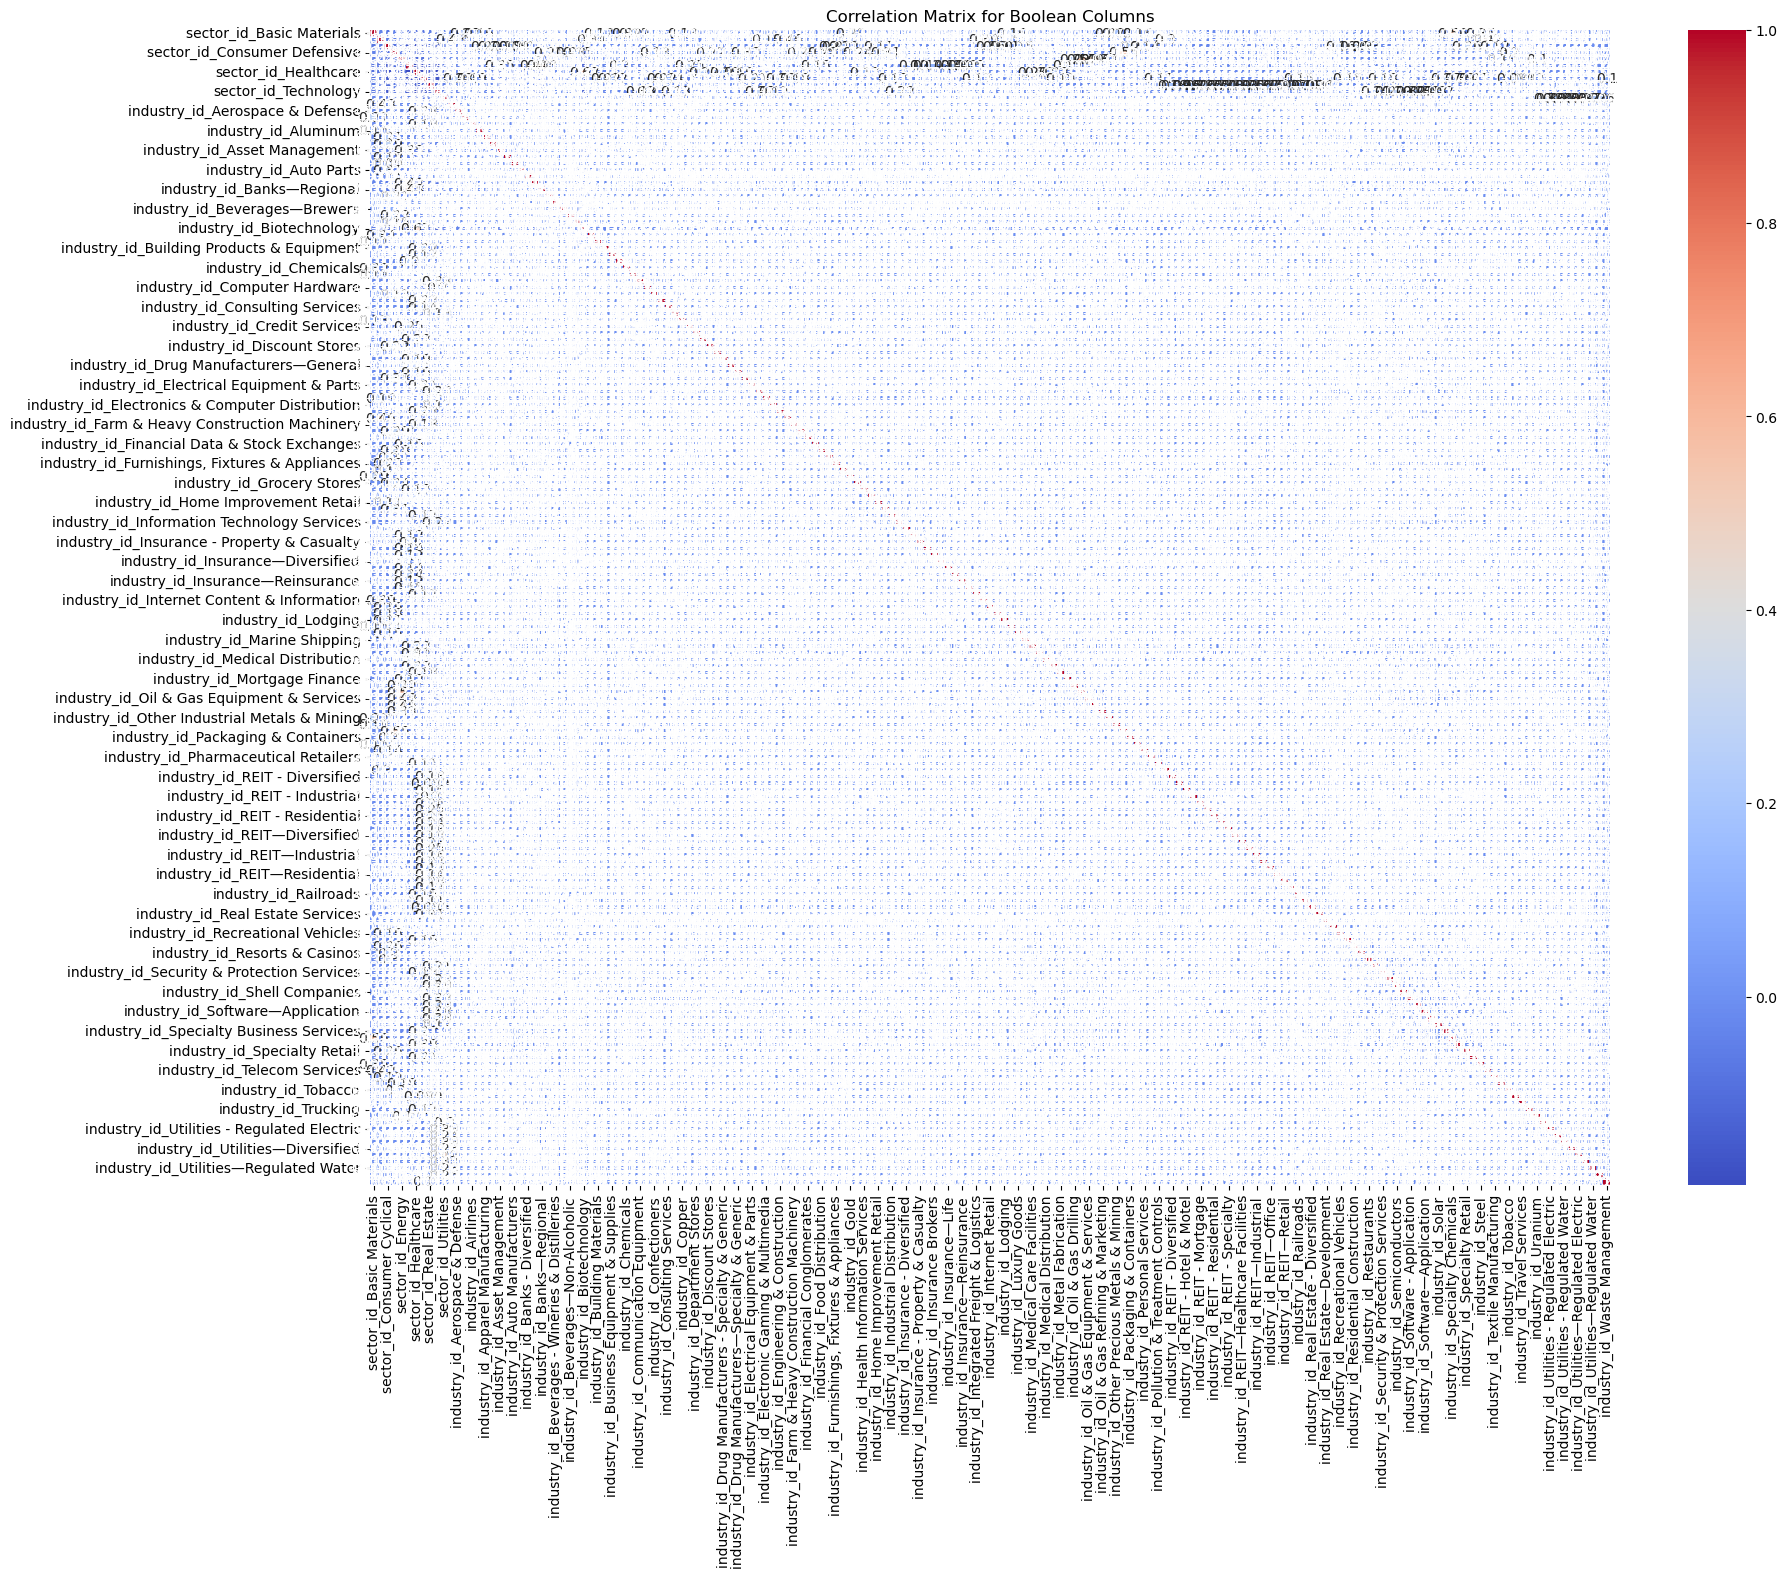

In [9]:
boolean_columns = fs.select_dtypes(include=['bool']).columns
boolean_df = fs[boolean_columns]
boolean_df = boolean_df.astype(int)
correlation_matrix = boolean_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Boolean Columns')
plt.show()


In [10]:
import scipy.stats as stats

# Chi-Square Test example
chi2, p, dof, ex = stats.chi2_contingency(pd.crosstab(fs['sector_id_Basic Materials'], fs['industry_id_Aerospace & Defense']))

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi2 Statistic: 7.2676359442922305
P-value: 0.007020815236360814


In [11]:
temp = fs[['num_tokens', 'num_words',
       'flesch_ease', 'flesch_grade',
       'average_volume', 'change in volume', 'token_change',
       'word_change', 'flesch_ease_change', 'flesch_grade_change',]]

In [12]:
fs.columns.values

array(['Unnamed: 0', 'ticker', 'num_tokens', 'num_words', 'topic',
       'flesch_ease', 'flesch_grade', 'fog', 'dale_chall', 'v_index_DJI',
       'average_volume', 'change in volume', 'token_change',
       'word_change', 'flesch_ease_change', 'flesch_grade_change',
       'fog_change', 'dale_chall_change', 'sector_id_Basic Materials',
       'sector_id_Communication Services', 'sector_id_Consumer Cyclical',
       'sector_id_Consumer Defensive', 'sector_id_Energy',
       'sector_id_Financial Services', 'sector_id_Healthcare',
       'sector_id_Industrials', 'sector_id_Real Estate',
       'sector_id_Technology', 'sector_id_Utilities',
       'industry_id_Advertising Agencies',
       'industry_id_Aerospace & Defense',
       'industry_id_Agricultural Inputs', 'industry_id_Airlines',
       'industry_id_Aluminum', 'industry_id_Apparel Manufacturing',
       'industry_id_Apparel Retail', 'industry_id_Asset Management',
       'industry_id_Auto & Truck Dealerships',
       'industry_i

In [13]:
# Chi-Square Test example
chi2, p, dof, ex = stats.chi2_contingency(pd.crosstab(fs['num_words'], fs['change in volume']))

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi2 Statistic: 149592382.77856433
P-value: 0.0


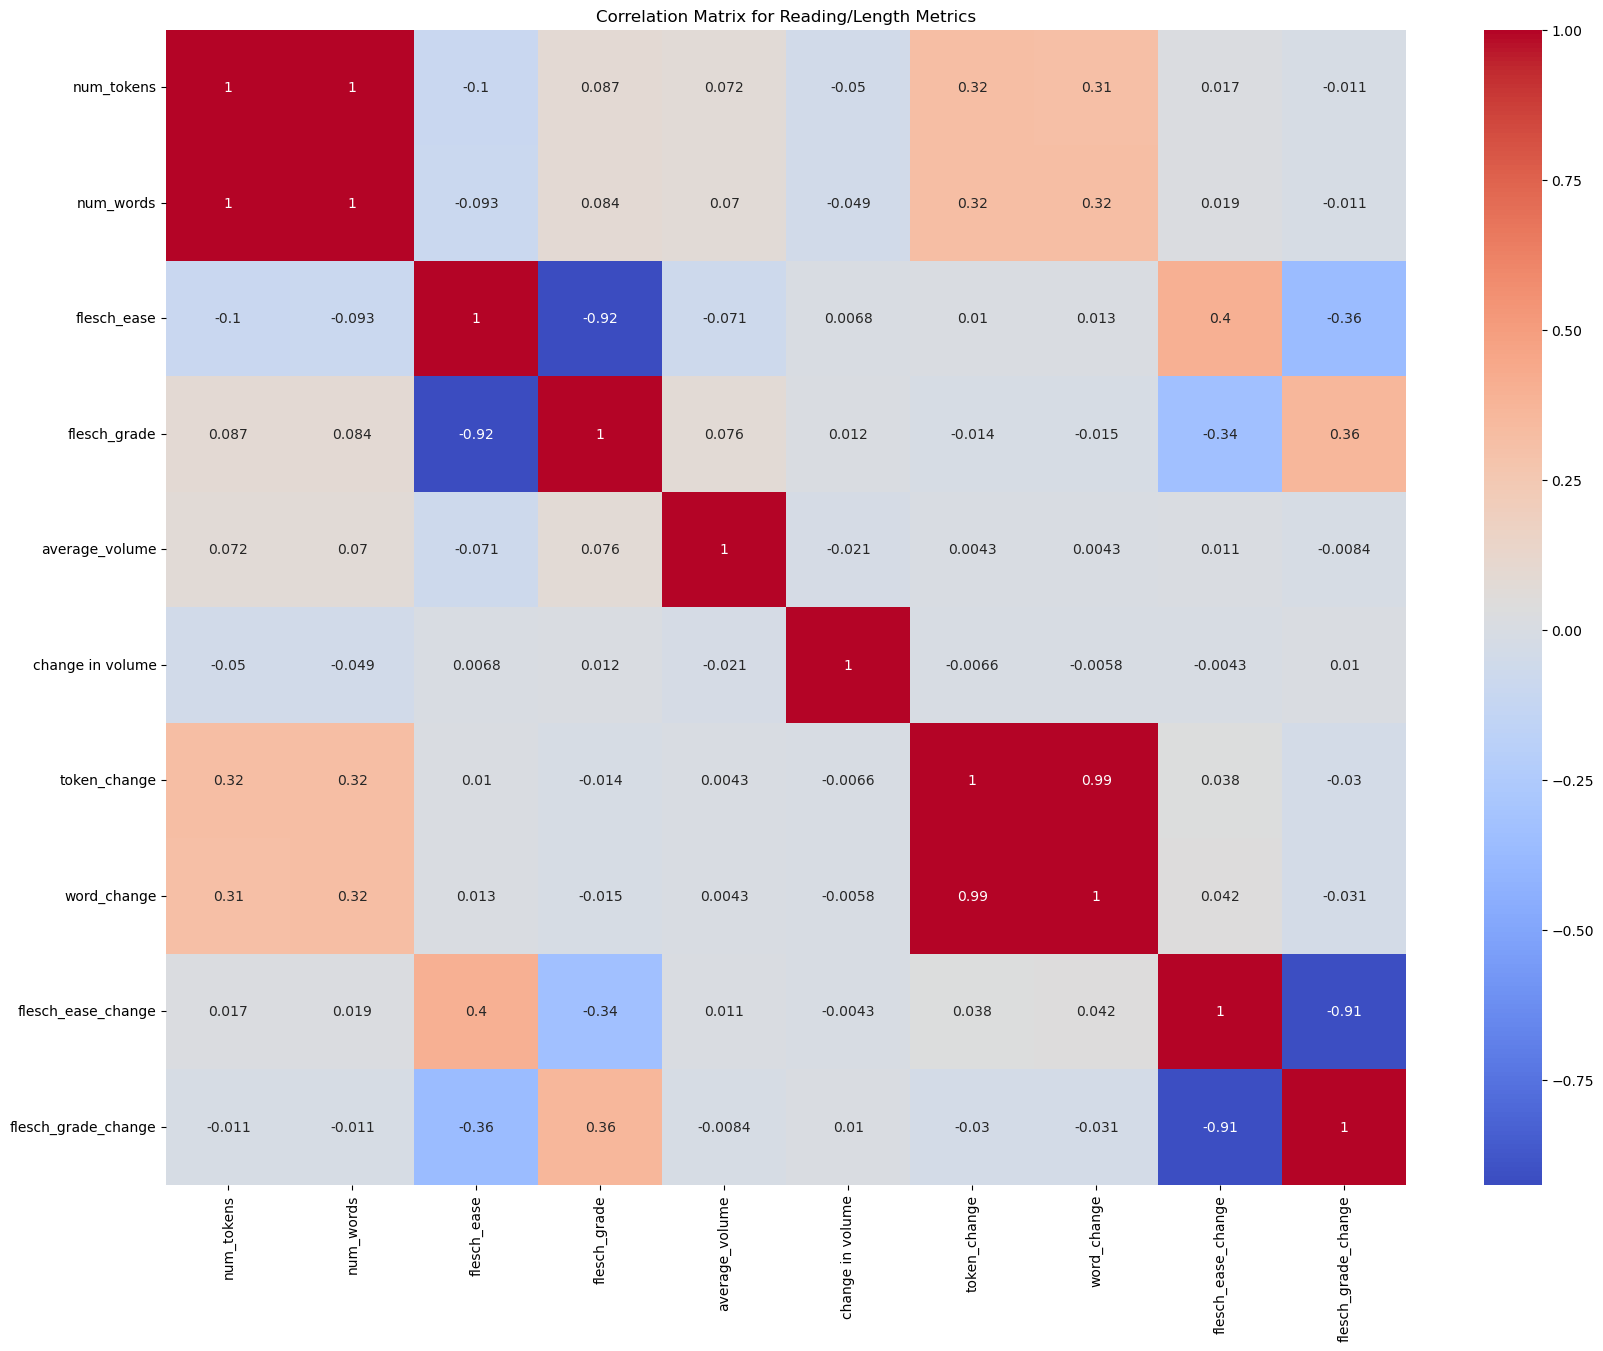

In [14]:
word_v_vol = temp
correlation_matrix = word_v_vol.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Reading/Length Metrics')
plt.show()